## Add bridge for 2 mask

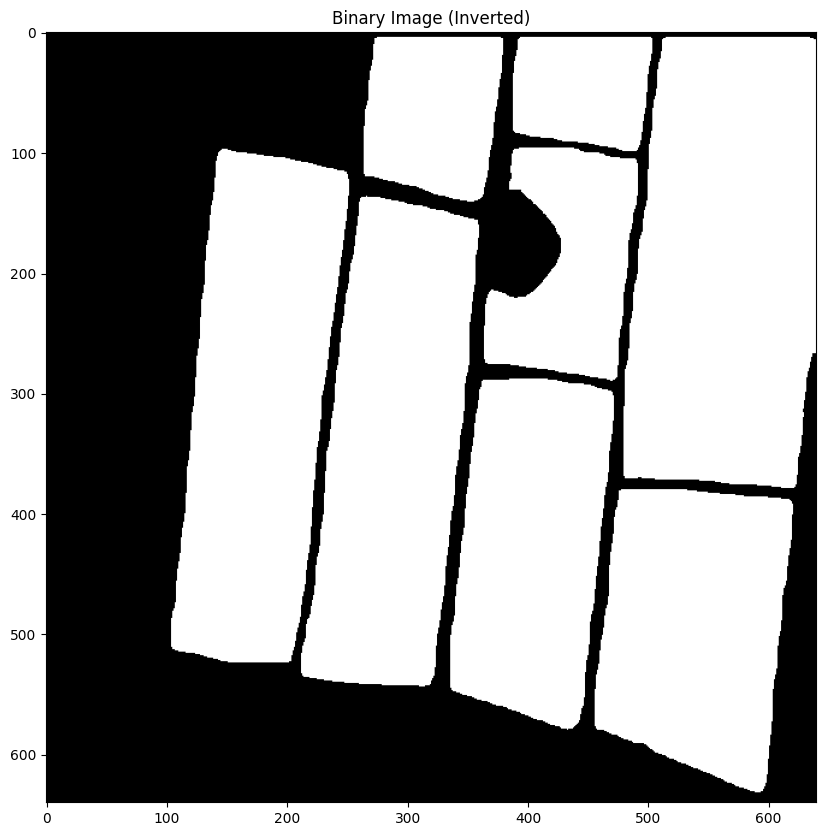

Number of contours detected: 8


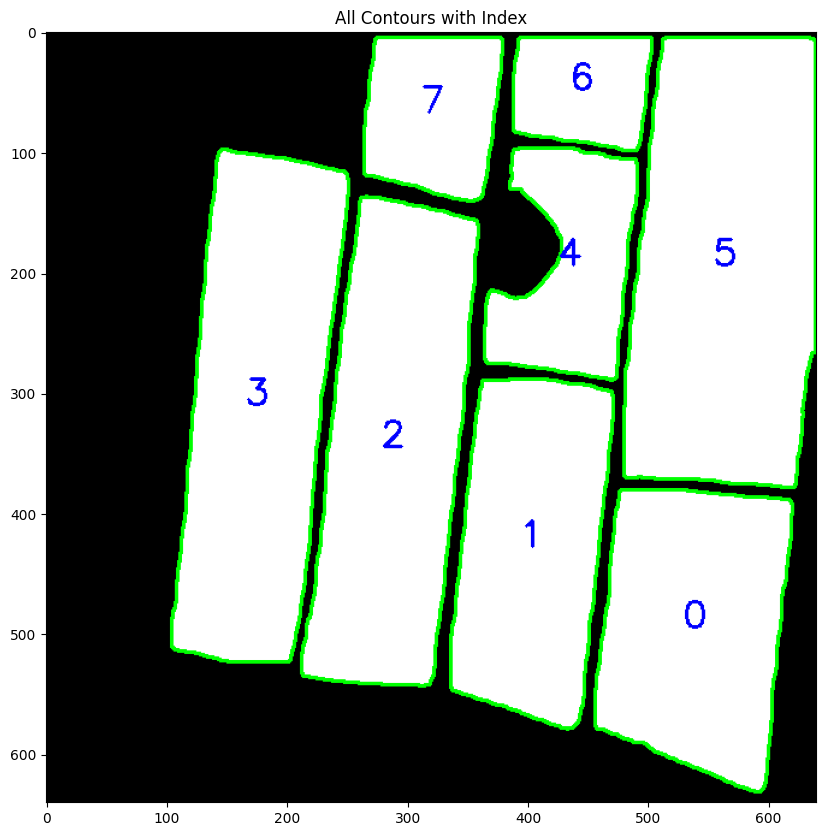

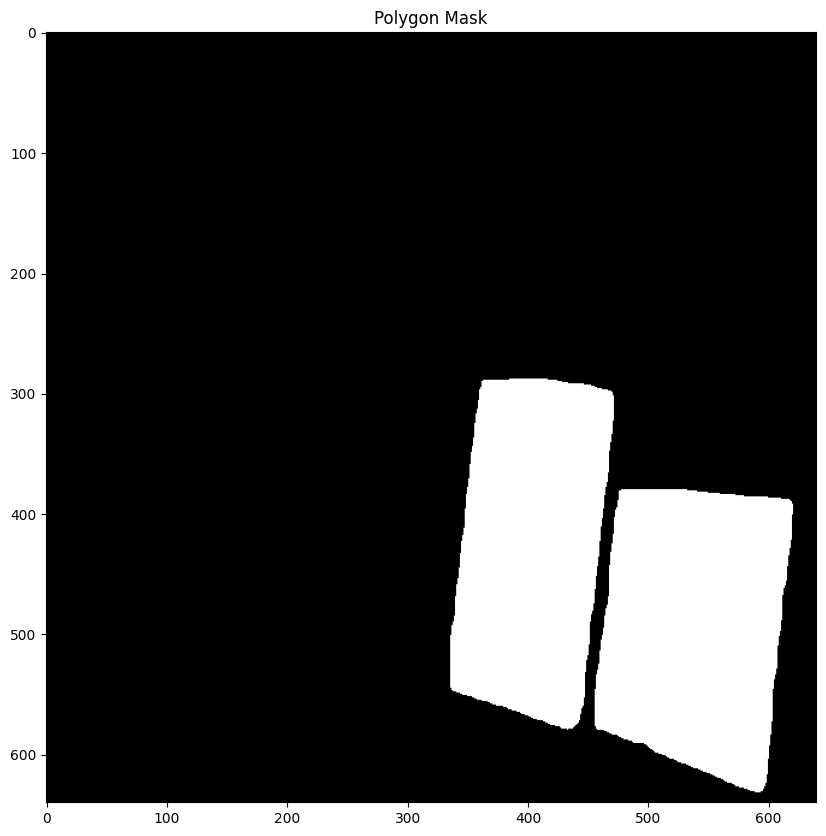

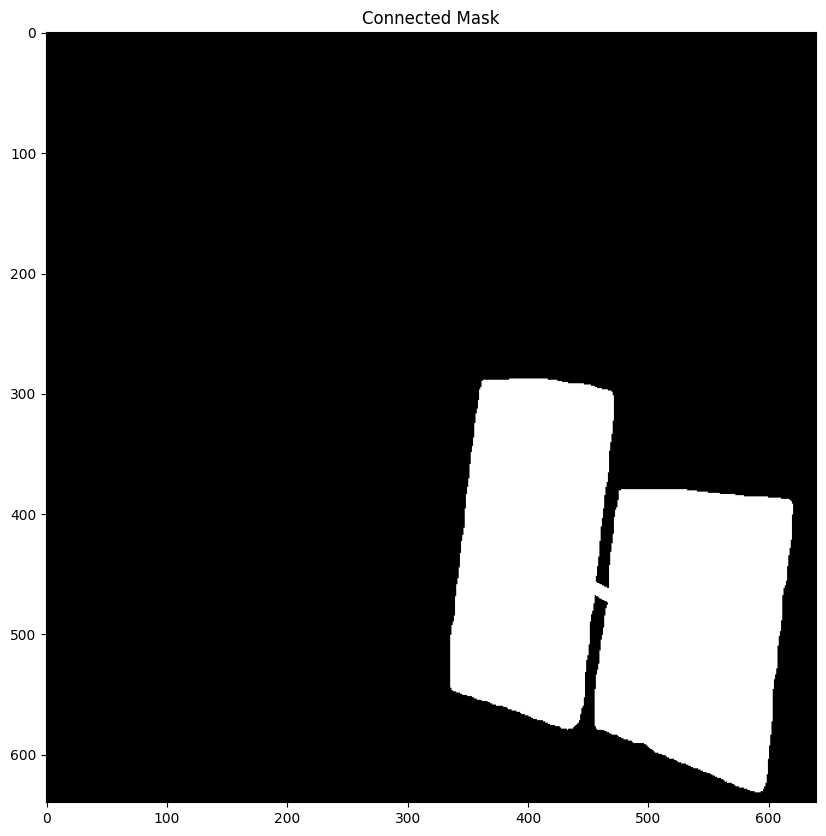

Final connected mask image saved as Add_bridge_Predicted_mask_for_Field28_epoch50.png


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Read the image
image = cv2.imread('Predicted mask for Field28(epoch50).png')

# Check if the image was successfully read
if image is None:
    raise ValueError("Unable to read the image")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the binary image
binary = cv2.bitwise_not(binary)

# Display the binary image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(binary, cmap='gray')
plt.title('Binary Image (Inverted)')
plt.show()

# Detect contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check the number of detected contours
print(f"Number of contours detected: {len(contours)}")

# Display all detected contours with indices
all_contours_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
for i, contour in enumerate(contours):
    cv2.drawContours(all_contours_img, [contour], -1, (0, 255, 0), thickness=2)
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(all_contours_img, str(i), (cX - 10, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(all_contours_img, str(i), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(all_contours_img)
plt.title('All Contours with Index')
plt.show()

# User inputs the indices of the two contours to be selected
index1 = int(input("Enter the index of the first contour: "))
index2 = int(input("Enter the index of the second contour: "))

# Get the two contours selected by the user
polygon1 = contours[index1]
polygon2 = contours[index2]

# Create an empty mask
mask = np.zeros_like(binary)

# Draw the two selected contours on the mask
cv2.drawContours(mask, [polygon1], -1, 255, thickness=cv2.FILLED)
cv2.drawContours(mask, [polygon2], -1, 255, thickness=cv2.FILLED)

# Display the mask with the polygons using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.title('Polygon Mask')
plt.show()

# Get the bounding rectangles of the two polygons
rect1 = cv2.boundingRect(polygon1)
rect2 = cv2.boundingRect(polygon2)

# Calculate the center points of the bounding rectangles
center1 = (rect1[0] + rect1[2] // 2, rect1[1] + rect1[3] // 2)
center2 = (rect2[0] + rect2[2] // 2, rect2[1] + rect2[3] // 2)

# Draw a line connecting the centers of the two polygons
cv2.line(mask, center1, center2, 255, thickness=10)  # Adjust the thickness of the connecting line

# Display the final connected mask using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.title('Connected Mask')
plt.show()

# Save the final connected mask image
output_filename = f"Add_bridge_Predicted_mask_for_Field28_epoch50.png"
cv2.imwrite(output_filename, mask)

# Print confirmation message
print(f"Final connected mask image saved as {output_filename}")